Koder er hentet fra tigjenglige Notebooks av Espen Sirnes og nettsiden https://seaborn.pydata.org/generated/seaborn.regplot.html

In [1]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://e24.no/spesial/skattelister/2020/5401/')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table class="table table-sm"><thead><tr><th class="w-5"></th><th class="w-30">Navn</th><th class="text-right clickable">Inntekt<i class="material-icons md-14 middle"></i></th><th class="text-right clickable">Formue</th><th class="text-right clickable">Skatt</th></tr></thead><tbody><tr><td>1<!-- -->.</td><td><div class="name">BENEDICTE SIGRID BERG<!-- --> <!-- -->SCHILBRED</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/5401/">Tromsø</a>, f.<!-- --> <!-- -->1946</div></td><td class="text-right">22 811 592</td><td class="text-right">518 064 470</td><td class="text-right">9 856 942</td></tr><tr><td>2<!-- -->.</td><td><div class="name">BJØRNAR HALLSTEIN<!-- --> <!-- -->DANIELSEN</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/5401/">Tromsø</a>, f.<!-- --> <!-- -->1947</div></td><td class="text-right">18 971 820</td><td class="text-right">3 215 530</td><td class="text-right">6 023 447</td></tr><tr><td>3<!-- -->.</td><

In [2]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['', 'Navn', 'Inntekt\ue5cf', 'Formue', 'Skatt'], ['1.', 'BENEDICTE SIGRID BERG SCHILBREDTromsø, f.1946', '22811592', '518064470', '9856942'], ['2.', 'BJØRNAR HALLSTEIN DANIELSENTromsø, f.1947', '18971820', '3215530', '6023447'], ['3.', 'ROAR DONSTromsø, f.1954', '16087630', '466128321', '9108653'], ['4.', 'EINAR SØRENSENTromsø, f.1951', '15011383', '86093233', '4050878'], ['5.', 'BERIT BREKMO TØLLEFSENTromsø, f.1959', '13628090', '25050145', '4505435'], ['6.', 'TROELS WALSTED HANSENTromsø, f.1976', '11898099', '6273045', '5326270'], ['7.', 'LIV ÅSE LINDRUPSENTromsø, f.1947', '11834931', '5099172', '2640883'], ['8.', 'TOR HARALD LINDRUPSENTromsø, f.1948', '11764685', '9430602', '2664120'], ['9.', 'ERIK MATHISENTromsø, f.1976', '11641156', '68190031', '4296212'], ['10.', 'LARS IVER MAGNE LARSENTromsø, f.1963', '11211420', '11786044', '3732898'], ['11.', 'SIGBJØRN ESPENESTromsø, f.1972', '10374454', '36206408', '3683318'], ['12.', 'RUNE HANSENTromsø, f.1973', '10241964', '94100605', '41

In [3]:
';'.join(table[0])

';Navn;Inntekt\ue5cf;Formue;Skatt'

In [4]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('Inntekt.csv',table)

In [5]:
import pandas as pd
Tabell=pd.read_csv('Inntekt.csv', delimiter=';')
Tabell=Tabell.rename(columns={'Inntekt': 'Inntekt'})
Tabell.pop('Unnamed: 0')
Tabell

,Navn,Inntekt,Formue,Skatt
0,"BENEDICTE SIGRID BERG SCHILBREDTromsø, f.1946",22811592,518064470,9856942
1,"BJØRNAR HALLSTEIN DANIELSENTromsø, f.1947",18971820,3215530,6023447
2,"ROAR DONSTromsø, f.1954",16087630,466128321,9108653
3,"EINAR SØRENSENTromsø, f.1951",15011383,86093233,4050878
4,"BERIT BREKMO TØLLEFSENTromsø, f.1959",13628090,25050145,4505435
5,"TROELS WALSTED HANSENTromsø, f.1976",11898099,6273045,5326270
6,"LIV ÅSE LINDRUPSENTromsø, f.1947",11834931,5099172,2640883
7,"TOR HARALD LINDRUPSENTromsø, f.1948",11764685,9430602,2664120
8,"ERIK MATHISENTromsø, f.1976",11641156,68190031,4296212
9,"LARS IVER MAGNE LARSENTromsø, f.1963",11211420,11786044,3732898


In [6]:
Tabell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Navn     20 non-null     object
 1   Inntekt  20 non-null     int64 
 2   Formue   20 non-null     int64 
 3   Skatt    20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


In [7]:
from statsmodels.regression.linear_model import OLS

res=OLS(Tabell['Skatt'].astype(float), Tabell['Inntekt'].astype(float)).fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Skatt   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              318.1
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                    2.53e-13
Time:                        11:45:12   Log-Likelihood:                         -307.14
No. Observations:                  20   AIC:                                      616.3
Df Residuals:                      19   BIC:                                      617.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Vi kan se at det er en positiv korrelasjon mellom skatt og inntekt av de top 20 høyest inntekt i Troms. I grafen ser vi at det er noen avvik ved at noen betaler mer skatt en andre med høyere inntekt. Dette kan forklares i tabellen over med at fotmue spiller en rolle inn i skatten. Alikevell kan vi tekke en positiv korrelasjon til at jo høyere inntekt individet har jo mer skatt betaler man, noe som gir mening med skattesystemet vi har i Norge. 


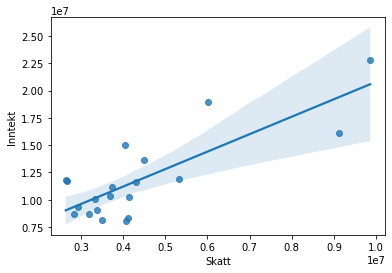

In [8]:
import seaborn as sns


sns.regplot(x = 'Skatt', y= 'Inntekt', data = Tabell);